In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def mse(y_true,y_pred):
    return np.mean((y_true-y_pred)**2)

In [4]:
def rmse(y_true,y_pred):
    return np.sqrt(mse(y_true,y_pred))

In [5]:
def r2_score(y_true,y_pred):
    r2_res=np.sum((y_true-y_pred)**2)
    r2_total=np.sum((y_true-np.mean(y_true))**2)
    return 1-r2_res/r2_total if r2_total!=0 else 0.0

In [6]:
data=pd.read_csv("linear_regression_dataset.csv")
print("the size of the data is",data.shape)
print(data.head(10))

the size of the data is (500, 6)
   AGE  FEMALE  LOS  RACE  TOTCHG  APRDRG
0   17       1    2   1.0    2660     560
1   17       0    2   1.0    1689     753
2   17       1    7   1.0   20060     930
3   17       1    1   1.0     736     758
4   17       1    1   1.0    1194     754
5   17       0    0   1.0    3305     347
6   17       1    4   1.0    2205     754
7   16       1    2   1.0    1167     754
8   16       1    1   1.0     532     753
9   17       1    2   1.0    1363     758


In [7]:
print(data["AGE"].unique())
print(data["RACE"].unique())
print(data["LOS"].unique())
print(data["FEMALE"].unique())



[17 16 15 14 13 12 11 10  7  6  3  2  1  0  5  4  8  9]
[ 1.  4.  6.  2.  5. nan  3.]
[ 2  7  1  0  4  3  5 12  6 41 17 10 39  8 18 15  9 23 24]
[1 0]


In [8]:
print(data["RACE"].isnull().sum())
print(data["TOTCHG"].isnull().sum())
print(data["APRDRG"].isnull().sum())



1
0
0


so null value is only is race as there is only one field we can delete it it wont matter much. the total size of the field is 500 so if we drop even one it wont matter

In [9]:
data = data.dropna(subset=["RACE"])
print(data.shape)

(499, 6)


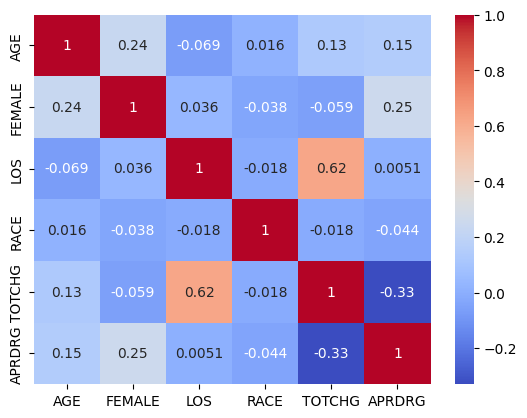

In [10]:
corr_matrix=data.corr()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.show()

in this we have two features that we can remove that is female and APRDRG but i will keep for it now and remove it latter just in case it disruptes accuracy ill remove it. i tried removing it but the accuracy fell so the we keep the columns

In [11]:
print(data["RACE"].unique())

[1. 4. 6. 2. 5. 3.]


i will one hot encode the race column the number of values seem like it can be one hot encoded even though this column has less relation 

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.loc[:,"RACE"]=le.fit_transform(data["RACE"])

In [13]:
print(data.shape)
print(data.info())

(499, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     499 non-null    int64  
 1   FEMALE  499 non-null    int64  
 2   LOS     499 non-null    int64  
 3   RACE    499 non-null    float64
 4   TOTCHG  499 non-null    int64  
 5   APRDRG  499 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 27.3 KB
None


In [14]:
# def normalize(col,data):
#     mean=data[col].mean()
#     std=data[col].std()
#     data[col]=(data[col]-mean/std)
# coloumns=["AGE","LOS","TOTCHG","APRDRG"]
# for i in coloumns:
#     normalize(i,data)

In [15]:
columns_m = ["AGE", "FEMALE", "LOS", "RACE", "APRDRG"]
X = data[columns_m].values
y = data["TOTCHG"].values.reshape(-1,1)
    

In [16]:
import numpy as np
n=X.shape[0]
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
split=int(n*0.8)

X_train=X[idx[:split]]
X_test=X[idx[split:]]
y_train=y[idx[:split]]
y_test=y[idx[split:]]

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)





(399, 5) (100, 5)
(399, 1) (100, 1)


In [17]:
X_mean=X_train.mean(axis=0)
X_std=X_train.std(axis=0)
X_train_norm=(X_train-X_mean)/X_std
X_test_norm=(X_test-X_mean)/X_std

In [18]:
X_train = X_train_norm
X_test = X_test_norm


In [19]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


In [20]:
col=X_train.shape[1]
m=len(y_train)
alpha=1.0e-1
n_features = X_train_norm.shape[1]
w = np.zeros((n_features, 1))   # shape (5,1)
b = 0


In [21]:
def gradient_descent(X, y, weight, bias, alpha, number_iter):
    m = len(y)
    cost_history = []

    for i in range(number_iter + 1):
        pred = X.dot(weight) + bias         # (m,1)
        
        errors = pred - y                   # (m,1)
        
        dw = (1/m) * X.T.dot(errors)        # (n,1)
        db = (1/m) * errors.sum()           # scalar

        weight = weight - alpha * dw
        bias = bias - alpha * db

        cost = (1/(2*m)) * np.sum(errors**2)
        train_r2 = r2_score(y.reshape(-1), pred)
        train_rmse = rmse(y.reshape(-1), pred)
        train_mae = mse(y.reshape(-1), pred)
        cost_history.append(cost)

        
        print(f"Iteration {i}: Cost = {cost}")
        print(f"  Train Cost = {cost:.4f}")
        print(f"  Train R2   = {train_r2:.4f}")
        print(f"  Train RMSE = {train_rmse:.4f}")
        print(f"  Train MAE  = {train_mae:.4f}")

    return weight, bias, cost_history

alpha = 0.01
number_iter = 2000

weight, bias, cost_history = gradient_descent(
    X_train_norm, y_train, w, b, alpha, number_iter
)


Iteration 0: Cost = 11567562.825814536
  Train Cost = 11567562.8258
  Train R2   = -592.4914
  Train RMSE = 4809.8987
  Train MAE  = 23135125.6516
Iteration 1: Cost = 11421154.683683151
  Train Cost = 11421154.6837
  Train R2   = -588.6386
  Train RMSE = 4794.2608
  Train MAE  = 22984936.4142
Iteration 2: Cost = 11277601.519091794
  Train Cost = 11277601.5191
  Train R2   = -584.8972
  Train RMSE = 4779.0260
  Train MAE  = 22839089.9836
Iteration 3: Cost = 11136847.082181107
  Train Cost = 11136847.0822
  Train R2   = -581.2646
  Train RMSE = 4764.1880
  Train MAE  = 22697487.2488
Iteration 4: Cost = 10998836.244710108
  Train Cost = 10998836.2447
  Train R2   = -577.7384
  Train RMSE = 4749.7401
  Train MAE  = 22560031.2079
Iteration 5: Cost = 10863514.977371287
  Train Cost = 10863514.9774
  Train R2   = -574.3161
  Train RMSE = 4735.6760
  Train MAE  = 22426626.9234
Iteration 6: Cost = 10730830.327572348
  Train Cost = 10730830.3276
  Train R2   = -570.9954
  Train RMSE = 4721.9891


Iteration 21: Cost = 9024000.307482028
  Train Cost = 9024000.3075
  Train R2   = -531.8977
  Train RMSE = 4557.7513
  Train MAE  = 20773097.0095
Iteration 22: Cost = 8927099.19452619
  Train Cost = 8927099.1945
  Train R2   = -529.9161
  Train RMSE = 4549.2694
  Train MAE  = 20695852.4857
Iteration 23: Cost = 8832079.78551722
  Train Cost = 8832079.7855
  Train R2   = -528.0026
  Train RMSE = 4541.0636
  Train MAE  = 20621258.9011
Iteration 24: Cost = 8738905.186823536
  Train Cost = 8738905.1868
  Train R2   = -526.1554
  Train RMSE = 4533.1284
  Train MAE  = 20549253.3057
Iteration 25: Cost = 8647539.236189943
  Train Cost = 8647539.2362
  Train R2   = -524.3730
  Train RMSE = 4525.4584
  Train MAE  = 20479774.1039
Iteration 26: Cost = 8557946.488049693
  Train Cost = 8557946.4880
  Train R2   = -522.6539
  Train RMSE = 4518.0484
  Train MAE  = 20412761.0265
Iteration 27: Cost = 8470092.199136127
  Train Cost = 8470092.1991
  Train R2   = -520.9966
  Train RMSE = 4510.8929
  Train M

In [24]:
y_test_pred=X_test.dot(weight)+bias
r2_val=r2_score(y_test,y_test_pred)
print(f"R2:{r2_val}")
rmse_val=rmse(y_test,y_test_pred)
print(f"RMSE:{rmse_val:.4f}")


R2:0.8574146872805153
RMSE:1379.7158


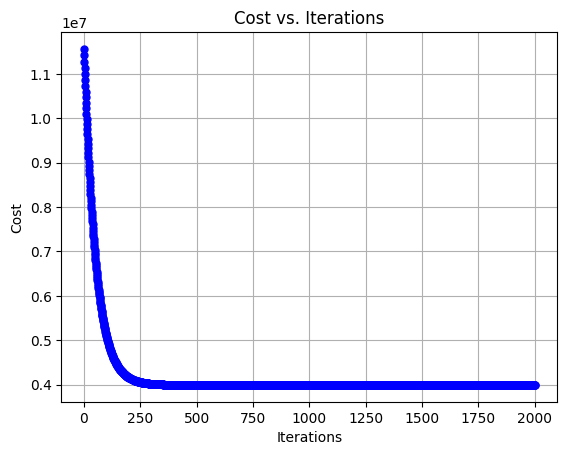

In [25]:
plt.plot(cost_history, color='b',marker='.',ms=10,mec='b')
plt.plot()
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.grid()  
plt.show()

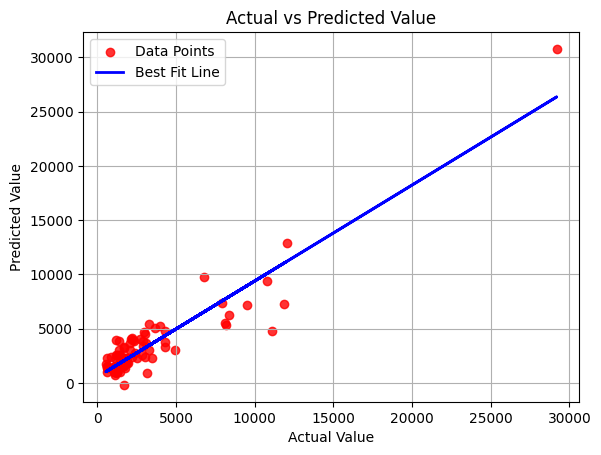

In [26]:
# convert to 1D
y_test_1d = np.ravel(y_test)
y_pred_1d = np.ravel(y_test_pred)

plt.scatter(y_test_1d, y_pred_1d, color='r', alpha=0.8, label="Data Points")

# best fit line
slope, intercept = np.polyfit(y_test_1d, y_pred_1d, 1)
best_fit_line = slope * y_test_1d + intercept

plt.plot(y_test_1d, best_fit_line, color='blue', linewidth=2, label="Best Fit Line")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Value")
plt.legend()
plt.grid(True)
plt.show()
